In [181]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

data = pd.read_csv('dfdf.csv')
test_data = data[data['Survived'].isnull()]
train_data = data[data['Survived'].notnull()]
X_train = train_data.drop('Survived',axis = 1)
X_test = test_data.drop('Survived',axis = 1)
y_train = train_data['Survived']
y_test = df_test.iloc[:,1] # this a cheat from 100% accuracy data

In [182]:
print(X_test.shape)
print(X_train.shape)

(418, 357)
(891, 357)


# First, try 300+ features

## If it does not work well, then try small features

In [122]:
X_train.head()

,Age,Fare_scaled,Fare_bin_id_scaled,SibSp_scaled,Parch_scaled,Embarked_scaled,CabinNumber_scaled,CabinLetter_scaled,Names_scaled,Title_id_scaled,...,Embarked_scaled-CabinNumber_scaled,Embarked_scaled/Pclass_scaled,Embarked_scaled-Pclass_scaled,Embarked_scaled/Title_id_scaled,Embarked_scaled-Title_id_scaled,Embarked_scaled/TicketNumber_scaled,Embarked_scaled-TicketNumber_scaled,Embarked_scaled/CabinLetter_scaled,Embarked_scaled-CabinLetter_scaled,Embarked_scaled*Embarked_scaled
0,22.0,-0.503281,-1.323333,0.481288,-0.445,-0.603436,-0.420654,-0.438679,-0.449489,-0.737684,...,-0.182782,-0.716741,-1.445352,0.818013,0.134249,1.353909,-0.157737,1.375573,-0.164756,0.364135
1,38.0,0.734766,-0.434547,0.481288,-0.445,0.927373,2.843455,0.118827,2.200874,0.319959,...,-1.916082,-0.599815,2.473471,2.898408,0.607414,-2.256688,1.338317,7.804414,0.808546,0.860021
2,26.0,-0.490231,0.454238,-0.479087,-0.445,-0.603436,-0.420654,-0.438679,-0.449489,1.377603,...,-0.182782,-0.716741,-1.445352,-0.438033,-1.981039,1.353891,-0.157731,1.375573,-0.164756,0.364135
3,35.0,0.383203,-0.434547,0.481288,-0.445,-0.603436,4.302704,0.118827,2.200874,0.319959,...,-4.906139,0.390296,0.942662,-1.885975,-0.923395,2.731632,-0.382529,-5.078282,-0.722262,0.364135
4,35.0,-0.487814,0.454238,-0.479087,-0.445,-0.603436,-0.420654,-0.438679,-0.449489,-0.737684,...,-0.182782,-0.716741,-1.445352,0.818013,0.134249,-2.066631,-0.895426,1.375573,-0.164756,0.364135


## Based on X_train data form Xiaoyu; (all features included)

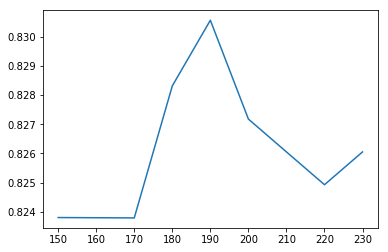

The best scores is 0.8305578254454659 when n_estimator = 190
The test score is 0.7703349282296651


In [187]:
# Let's try to find a good estimator to get max cross validation score
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score
def rf_clf(X_train, X_test, 
           params = {'n_estimators':[150, 170, 180, 190, 200 ,220, 230]}):
    scores_ = []
    for n in params['n_estimators']:
        forest = RandomForestClassifier(n_estimators=n,random_state=0,
                                       min_samples_split=4, max_features = 'sqrt')
        forest.fit(X_train, y_train)
        scores = cross_val_score(forest, X_train, y_train, cv=10)
        score = np.average(scores)
        scores_.append(score)
    plt.plot(params['n_estimators'], scores_)
    plt.show()
    print('The best scores is {0} when n_estimator = {1}'.format(max(scores_), 
                                                                 params['n_estimators'][scores_.index(max(scores_))]))
    n = params['n_estimators'][scores_.index(max(scores_))]
    forest = RandomForestClassifier(n_estimators=n,random_state=0,
                                       min_samples_split=4, max_features = 'sqrt')
    forest.fit(X_train, y_train)
    print('The test score is {}'.format(accuracy_score(y_test, forest.predict(X_test))))
rf_clf(X_train, X_test)

In [204]:
# let's try gridsearchCV
def rf_clf_grid(X_train, X_test, 
                params = {'n_estimators':[1,5,10,20,50, 70,100, 150, 200]}):
    from sklearn.model_selection import GridSearchCV
    params = {'n_estimators':[1,5,10,20,50, 70,100, 150, 200],
             'min_samples_split':[2,3,4,5,6,7,8,9,10]}
    grid_search = GridSearchCV(RandomForestClassifier(random_state=0), 
                               params, cv = 5)
    grid_search.fit(X_train, y_train)
    print('train score - ' + str(grid_search.score(X_train, y_train)))
    print('test score - ' + str(grid_search.score(X_test, y_test)))
    print('best params are' + str(grid_search.best_params_))
    #return grid_search
#rf_clf_grid(X_train, X_test)

## Let's try drop the age column

In [192]:
X_train.shape

(891, 357)

In [193]:
datasets = [X_train, X_test]
datasets[0].head()

,Age,Fare_scaled,Fare_bin_id_scaled,SibSp_scaled,Parch_scaled,Embarked_scaled,CabinNumber_scaled,CabinLetter_scaled,Names_scaled,Title_id_scaled,...,Embarked_scaled-CabinNumber_scaled,Embarked_scaled/Pclass_scaled,Embarked_scaled-Pclass_scaled,Embarked_scaled/Title_id_scaled,Embarked_scaled-Title_id_scaled,Embarked_scaled/TicketNumber_scaled,Embarked_scaled-TicketNumber_scaled,Embarked_scaled/CabinLetter_scaled,Embarked_scaled-CabinLetter_scaled,Embarked_scaled*Embarked_scaled
0,22.0,-0.503281,-1.323333,0.481288,-0.445,-0.603436,-0.420654,-0.438679,-0.449489,-0.737684,...,-0.182782,-0.716741,-1.445352,0.818013,0.134249,1.353909,-0.157737,1.375573,-0.164756,0.364135
1,38.0,0.734766,-0.434547,0.481288,-0.445,0.927373,2.843455,0.118827,2.200874,0.319959,...,-1.916082,-0.599815,2.473471,2.898408,0.607414,-2.256688,1.338317,7.804414,0.808546,0.860021
2,26.0,-0.490231,0.454238,-0.479087,-0.445,-0.603436,-0.420654,-0.438679,-0.449489,1.377603,...,-0.182782,-0.716741,-1.445352,-0.438033,-1.981039,1.353891,-0.157731,1.375573,-0.164756,0.364135
3,35.0,0.383203,-0.434547,0.481288,-0.445,-0.603436,4.302704,0.118827,2.200874,0.319959,...,-4.906139,0.390296,0.942662,-1.885975,-0.923395,2.731632,-0.382529,-5.078282,-0.722262,0.364135
4,35.0,-0.487814,0.454238,-0.479087,-0.445,-0.603436,-0.420654,-0.438679,-0.449489,-0.737684,...,-0.182782,-0.716741,-1.445352,0.818013,0.134249,-2.066631,-0.895426,1.375573,-0.164756,0.364135


In [199]:
for i in range(2):
    try:
        datasets[i] = datasets[i].drop(['Age', 'Age1'],axis=1)
    except:
        pass
for dataset in datasets:
    print('New data shape')
    print(dataset.shape)

New data shape
(891, 355)
New data shape
(418, 355)


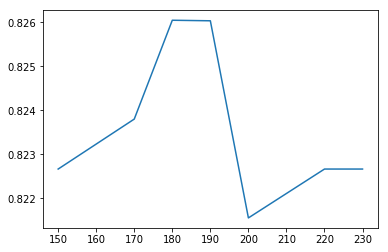

The best scores is 0.8260503915560096 when n_estimator = 180
The test score is 0.7607655502392344


In [197]:
# Let's try the new train data
rf_clf(datasets[0], datasets[1])

In [266]:
rf_clf_grid(X_train, X_test)

train score - 0.955106621773
test score - 0.77033492823
best params are{'min_samples_split': 7, 'n_estimators': 70}


In [205]:
# let's try gridsearchcv
rf_clf_grid(datasets[0], datasets[1])
#print(rf_clf_grid(datasets[0], datasets[1]).best_params_)

train score - 0.950617283951
test score - 0.77990430622
best params are{'min_samples_split': 7, 'n_estimators': 50}


## Let's try some other data sources

In [148]:
def kernel_data():
    train_df = pd.read_csv('input/train.csv')
    test_df = pd.read_csv('input/test.csv')
    combine = [train_df, test_df]
    train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
    test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
    for dataset in combine:
        dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    for dataset in combine:
        dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

        dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    for dataset in combine:
        dataset['Title'] = dataset['Title'].map(title_mapping)
        dataset['Title'] = dataset['Title'].fillna(0)
    train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
    test_df = test_df.drop(['Name'], axis=1)
    combine = [train_df, test_df]
    for dataset in combine:
        dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    guess_ages = np.zeros((2,3))
    for dataset in combine:
        for i in range(0, 2):
            for j in range(0, 3):
                guess_df = dataset[(dataset['Sex'] == i) & \
                                      (dataset['Pclass'] == j+1)]['Age'].dropna()

                # age_mean = guess_df.mean()
                # age_std = guess_df.std()
                # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

                age_guess = guess_df.median()

                # Convert random age float to nearest .5 age
                guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

        for i in range(0, 2):
            for j in range(0, 3):
                dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                        'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)
    train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
    train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)
    for dataset in combine:    
        dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
        dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
        dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
        dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
        dataset.loc[ dataset['Age'] > 64, 'Age']
    train_df = train_df.drop(['AgeBand'], axis=1)
    combine = [train_df, test_df]  
    for dataset in combine:
        dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    for dataset in combine:
        dataset['IsAlone'] = 0
        dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
    test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
    combine = [train_df, test_df]
    for dataset in combine:
        dataset['Age*Class'] = dataset.Age * dataset.Pclass
    freq_port = train_df.Embarked.dropna().mode()[0]
    for dataset in combine:
        dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    for dataset in combine:
        dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
    train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
    for dataset in combine:
        dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
        dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
        dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
        dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
        dataset['Fare'] = dataset['Fare'].astype(int)

    train_df = train_df.drop(['FareBand'], axis=1)
    train_df.drop('Survived', axis=1, inplace=True)
    test_df.drop('PassengerId', axis=1, inplace = True)
    combine = [train_df, test_df]
    return combine
kaggle = kernel_data()

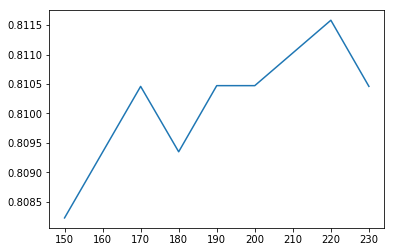

The best scores is 0.8115821132675064 when n_estimator = 220
The test score is 0.7559808612440191


In [164]:
rf_clf(kaggle[0], kaggle[1],
       params = {'n_estimators':[150, 170, 180, 190,200,220, 230]})

In [208]:
rf_clf_grid(kaggle[0], kaggle[1],
            params = {'n_estimators':[170, 180, 190,200,220, 230,250]})

train score - 0.843995510662
test score - 0.765550239234
best params are{'min_samples_split': 5, 'n_estimators': 5}


In [210]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## SVC

In [225]:
def svc_model(X_train, X_test):
    svc = SVC()
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print('Train accuracy {}'.format(svc.score(X_train, y_train)))
    print('Test accuracy {}'.format(accuracy_score(y_test, y_pred)))
svc_model(kaggle[0], kaggle[1]) # data cleaning from the kernel
svc_model(X_train, X_test) # data cleaning from Xiaoyu
svc_model(datasets[0], datasets[1]) #data cleaning from Xiaoyu but drop Age1 and Age

Train accuracy 0.8260381593714927
Test accuracy 0.7822966507177034
Train accuracy 0.9248035914702581
Test accuracy 0.6842105263157895
Train accuracy 0.9135802469135802
Test accuracy 0.6961722488038278


In [240]:
def svc_model_grid(X_train, X_test):
    params = {'C': [1, 10, 100, 1000], 
                  'gamma': [0.01,0.1,1,0.001, 0.0001]}
     
    grid_search = GridSearchCV(SVC(random_state=0), params, cv=5)
    grid_search.fit(X_train, y_train)
    print('train score - ' + str(grid_search.score(X_train, y_train)))
    print('test score - ' + str(grid_search.score(X_test, y_test)))
    print('best params are' + str(grid_search.best_params_))    
svc_model_grid(kaggle[0], kaggle[1])
svc_model_grid(X_train, X_test)
svc_model(datasets[0],datasets[1])

train score - 0.851851851852
test score - 0.751196172249
best params are{'C': 100, 'gamma': 0.1}
train score - 0.845117845118
test score - 0.760765550239
best params are{'C': 1, 'gamma': 0.0001}
Train accuracy 0.9135802469135802
Test accuracy 0.6961722488038278


## KNN

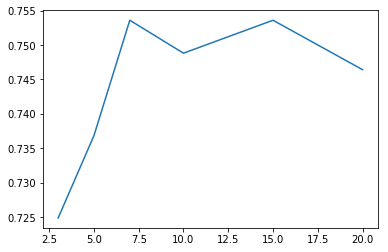

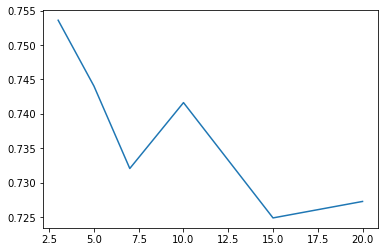

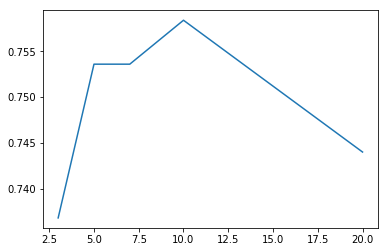

In [250]:
def knn(X_train, X_test):
    n_list = [3,5,7,10,15,20]
    scores = []
    for n in n_list:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        
        #print('Train accuracy {}'.format(accuracy_score(y_train, 
                                                        #knn.predict(X_train))))
        scores.append(accuracy_score(y_test, knn.predict(X_test)))
        #print('Test accuracy {}'.format(accuracy_score(y_test, y_pred)))
    plt.plot(n_list, scores)
    plt.show()
knn(X_train, X_test)
knn(kaggle[0], kaggle[1])
knn(datasets[0], datasets[1])

In [255]:
def knn_grid(X_train, X_test):
    params = {'n_neighbors':list(np.arange(3,20,2))}
    grid_search = GridSearchCV(KNeighborsClassifier(), params, cv=5)
    grid_search.fit(X_train, y_train)
    print('train score - ' + str(grid_search.score(X_train, y_train)))
    print('test score - ' + str(grid_search.score(X_test, y_test)))
    print('best params are' + str(grid_search.best_params_))  
knn_grid(X_train, X_test)
knn_grid(kaggle[0], kaggle[1])
knn_grid(datasets[0], datasets[1])

train score - 0.821548821549
test score - 0.741626794258
best params are{'n_neighbors': 13}
train score - 0.833894500561
test score - 0.732057416268
best params are{'n_neighbors': 7}
train score - 0.886644219978
test score - 0.736842105263
best params are{'n_neighbors': 3}


## DecisionTree

In [257]:
def decision(X_train, X_test):
    decision_tree = DecisionTreeClassifier(max_features='sqrt', random_state=0)
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    print('Train score is {}'.format(accuracy_score(y_train, 
                                                    decision_tree.predict(X_train))))
    print('Test score is {}'.format(accuracy_score(y_test, y_pred)))
decision(X_train, X_test)    
decision(kaggle[0], kaggle[1])
decision(datasets[0],datasets[1])

Train score is 0.9977553310886644
Test score is 0.722488038277512
Train score is 0.8574635241301908
Test score is 0.7559808612440191
Train score is 0.9932659932659933
Test score is 0.715311004784689


#### I'm not sure it's useful to do a gridsearchcv for Decision Tree

## Logistic Regression

In [260]:
def lr(X_train, X_test):
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print('Train score is {}'.format(lr.score(X_train, y_train)))
    print('Test score is {}'.format(accuracy_score(y_test, y_pred)))
lr(X_train, X_test)
lr(kaggle[0], kaggle[1])
lr(datasets[0], datasets[1])

Train score is 0.9023569023569024
Test score is 0.7583732057416268
Train score is 0.792368125701459
Test score is 0.7631578947368421
Train score is 0.9012345679012346
Test score is 0.7488038277511961


In [263]:
def lr_grid(X_train, X_test):
    params = {'penalty':['l1','l2'],
             'C':[0.01,0.1,1,10]}
    grid_search = GridSearchCV(LogisticRegression(random_state=0), params, cv=5)
    grid_search.fit(X_train, y_train)
    print('train score - ' + str(grid_search.score(X_train, y_train)))
    print('test score - ' + str(grid_search.score(X_test, y_test)))
    print('best params are' + str(grid_search.best_params_))  
lr_grid(X_train, X_test)
lr_grid(kaggle[0], kaggle[1])
lr_grid(datasets[0], datasets[1])    

train score - 0.868686868687
test score - 0.772727272727
best params are{'C': 0.01, 'penalty': 'l2'}
train score - 0.793490460157
test score - 0.763157894737
best params are{'C': 0.1, 'penalty': 'l1'}
train score - 0.858585858586
test score - 0.767942583732
best params are{'C': 0.1, 'penalty': 'l1'}


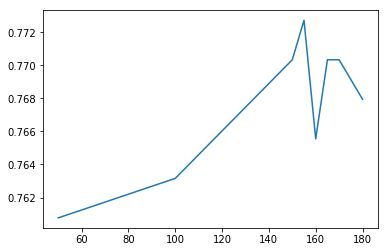

The best scores is 0.7727272727272727 when n_estimator = 155
The test score is 0.7727272727272727


In [222]:
# let's cheat
def cheat(X_train, X_test, 
           params = {'n_estimators':[150, 170, 180, 190, 200 ,220, 230]}):
    scores_ = []
    for n in params['n_estimators']:
        forest = RandomForestClassifier(n_estimators=n,random_state=0,
                                       min_samples_split=4, max_features = 'sqrt')
        forest.fit(X_train, y_train)
        score = accuracy_score(y_test,forest.predict(X_test))
        scores_.append(score)
    plt.plot(params['n_estimators'], scores_)
    plt.show()
    print('The best scores is {0} when n_estimator = {1}'.format(max(scores_), 
                                                                 params['n_estimators'][scores_.index(max(scores_))]))
    n = params['n_estimators'][scores_.index(max(scores_))]
    forest = RandomForestClassifier(n_estimators=n,random_state=0,
                                       min_samples_split=4, max_features = 'sqrt')
    forest.fit(X_train, y_train)
    print('The test score is {}'.format(accuracy_score(y_test, forest.predict(X_test))))

cheat(datasets[0], datasets[1],
      params = {'n_estimators':[50,100,150,155,160,165,170, 180]})


## This is from another Kernel, they got nearly 80%

In [264]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
from sklearn import cross_validation
import re
import operator
from sklearn.feature_selection import SelectKBest, f_classif

def new_kernel():
    #Print you can execute arbitrary python code
    train = pd.read_csv("input/train.csv", dtype={"Age": np.float64}, )
    test = pd.read_csv("input/test.csv", dtype={"Age": np.float64}, )

    target = train["Survived"].values
    full = pd.concat([train, test])
    #print(full.head())
    #print(full.describe())
    #print(full.info())

    full['surname'] = full["Name"].apply(lambda x: x.split(',')[0].lower())

    full["Title"] = full["Name"].apply(lambda x: re.search(' ([A-Za-z]+)\.',x).group(1))
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 2, "Mme": 3,"Don": 9,"Dona": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
    full["TitleCat"] = full.loc[:,'Title'].map(title_mapping)

    full["FamilySize"] = full["SibSp"] + full["Parch"] + 1
    full["FamilySize"] = pd.cut(full["FamilySize"], bins=[0,1,4,20], labels=[0,1,2])

    full["NameLength"] = full["Name"].apply(lambda x: len(x))

    full["Embarked"] = pd.Categorical.from_array(full.Embarked).codes

    full["Fare"] = full["Fare"].fillna(8.05)

    full = pd.concat([full,pd.get_dummies(full['Sex'])],axis=1)

    full['CabinCat'] = pd.Categorical.from_array(full.Cabin.fillna('0').apply(lambda x: x[0])).codes

    # function to get oven/odd/null from cabine 
    def get_type_cabine(cabine):
        # Use a regular expression to search for a title. 
        cabine_search = re.search('\d+', cabine)
        # If the title exists, extract and return it.
        if cabine_search:
            num = cabine_search.group(0)
            if np.float64(num) % 2 == 0:
                return '2'
            else:
                return '1'
        return '0'
    full["Cabin"] = full["Cabin"].fillna(" ")

    full["CabinType"] = full["Cabin"].apply(get_type_cabine)
    #print(pd.value_counts(full["CabinType"]))



    #### CHILD/FEMALE ADULT/MALE ADULT------------------------------------------------------------
    child_age = 18
    def get_person(passenger):
        age, sex = passenger
        if (age < child_age):
            return 'child'
        elif (sex == 'female'):
            return 'female_adult'
        else:
            return 'male_adult'
    full = pd.concat([full, pd.DataFrame(full[['Age', 'Sex']].apply(get_person, axis=1), columns=['person'])],axis=1)
    full = pd.concat([full,pd.get_dummies(full['person'])],axis=1)

    ### FEATURES BASED ON TICKET   --------------------------------------------------------
    table_ticket = pd.DataFrame(full["Ticket"].value_counts())
    table_ticket.rename(columns={'Ticket':'Ticket_Members'}, inplace=True)

    table_ticket['Ticket_perishing_women'] = full.Ticket[(full.female_adult == 1.0) 
                                        & (full.Survived == 0.0) 
                                        & ((full.Parch > 0) | (full.SibSp > 0))].value_counts()
    table_ticket['Ticket_perishing_women'] = table_ticket['Ticket_perishing_women'].fillna(0)
    table_ticket['Ticket_perishing_women'][table_ticket['Ticket_perishing_women'] > 0] = 1.0 

    table_ticket['Ticket_surviving_men'] = full.Ticket[(full.male_adult == 1.0) 
                                        & (full.Survived == 1.0) 
                                        & ((full.Parch > 0) | (full.SibSp > 0))].value_counts()
    table_ticket['Ticket_surviving_men'] = table_ticket['Ticket_surviving_men'].fillna(0)
    table_ticket['Ticket_surviving_men'][table_ticket['Ticket_surviving_men'] > 0] = 1.0 

    table_ticket["Ticket_Id"]= pd.Categorical.from_array(table_ticket.index).codes
    # compress under 3 members into one code.
    table_ticket["Ticket_Id"][table_ticket["Ticket_Members"] < 3 ] = -1
    table_ticket["Ticket_Members"] = pd.cut(table_ticket["Ticket_Members"], bins=[0,1,4,20], labels=[0,1,2])

    full = pd.merge(full, table_ticket, left_on="Ticket",right_index=True,how='left', sort=False)

    ### FEATURES BASED ON SURNAME    --------------------------------------------------------
    table_surname = pd.DataFrame(full["surname"].value_counts())
    table_surname.rename(columns={'surname':'Surname_Members'}, inplace=True)

    table_surname['Surname_perishing_women'] = full.surname[(full.female_adult == 1.0) 
                                        & (full.Survived == 0.0) 
                                        & ((full.Parch > 0) | (full.SibSp > 0))].value_counts()
    table_surname['Surname_perishing_women'] = table_surname['Surname_perishing_women'].fillna(0)
    table_surname['Surname_perishing_women'][table_surname['Surname_perishing_women'] > 0] = 1.0 

    table_surname['Surname_surviving_men'] = full.surname[(full.male_adult == 1.0) 
                                        & (full.Survived == 1.0) 
                                        & ((full.Parch > 0) | (full.SibSp > 0))].value_counts()
    table_surname['Surname_surviving_men'] = table_surname['Surname_surviving_men'].fillna(0)
    table_surname['Surname_surviving_men'][table_surname['Surname_surviving_men'] > 0] = 1.0 

    table_surname["Surname_Id"]= pd.Categorical.from_array(table_surname.index).codes
    # compress under 3 members into one code.
    table_surname["Surname_Id"][table_surname["Surname_Members"] < 3 ] = -1

    table_surname["Surname_Members"] = pd.cut(table_surname["Surname_Members"], bins=[0,1,4,20], labels=[0,1,2])

    full = pd.merge(full, table_surname, left_on="surname",right_index=True,how='left', sort=False)

    ### AGE PROCESSING --------------------------------------------------------------------------
    classers = ['Fare','Parch','Pclass','SibSp','TitleCat', 
    'CabinCat','female','male', 'Embarked', 'FamilySize', 'NameLength','Ticket_Members','Ticket_Id']
    etr = ExtraTreesRegressor(n_estimators=200)
    X_train = full[classers][full['Age'].notnull()]
    Y_train = full['Age'][full['Age'].notnull()]
    X_test = full[classers][full['Age'].isnull()]
    etr.fit(X_train,np.ravel(Y_train))
    age_preds = etr.predict(X_test)
    full['Age'][full['Age'].isnull()] = age_preds

    # FEATURES -----------------------------------------------------------------------------------
    features = ['female','male','Age','male_adult','female_adult', 'child','TitleCat', 'Pclass',
    'Pclass','Ticket_Id','NameLength','CabinType','CabinCat', 'SibSp', 'Parch',
    'Fare','Embarked','Surname_Members','Ticket_Members','FamilySize',
    'Ticket_perishing_women','Ticket_surviving_men',
    'Surname_perishing_women','Surname_surviving_men']

    train = full[0:891].copy()
    test = full[891:].copy()

    selector = SelectKBest(f_classif, k=len(features))
    selector.fit(train[features], target)
    scores = -np.log10(selector.pvalues_)
    indices = np.argsort(scores)[::-1]
    print("Features importance :")
    for f in range(len(scores)):
        print("%0.2f %s" % (scores[indices[f]],features[indices[f]]))

    # BEST CLASSIFIER METHOD ==> RANDOM FOREST -----------------------------------------------------
    rfc = RandomForestClassifier(n_estimators=3000, min_samples_split=4, class_weight={0:0.745,1:0.255})


    # CROSS VALIDATION WITH RANDOM FOREST CLASSIFIER METHOD-----------------------------------------
    kf = cross_validation.KFold(train.shape[0], n_folds=3, random_state=1)

    scores = cross_validation.cross_val_score(rfc, train[features], target, cv=kf)
    print("Accuracy: %0.3f (+/- %0.2f) [%s]" % (scores.mean()*100, scores.std()*100, 'RFC Cross Validation'))
    rfc.fit(train[features], target)
    score = rfc.score(train[features], target)
    print("Accuracy: %0.3f            [%s]" % (score*100, 'RFC full test'))
    importances = rfc.feature_importances_
    indices = np.argsort(importances)[::-1]
    #for f in range(len(features)):
        #print("%d. feature %d (%f) %s" % (f + 1, indices[f]+1, importances[indices[f]]*100, features[indices[f]]))


    # PREDICTION  -----------------------------------------------------------------------------------
    rfc.fit(train[features], target)
    predictions = rfc.predict(test[features])
    return predictions

In [265]:
accuracy_score(y_test, predictions)

0.80143540669856461

## Summary

### RandomForest

- Best test score is **0.77990430622**
- Data source: datasets[0], datasets[1] (Data from Xiaoyu, drop ['Age'], ['Age1'])
- params = {'min_samples_split': 7, 'n_estimators': 50}

### SVM

- Best test score: **0.7822966507177034**
- Data source: kaggle[0], kaggle[1] (Data from Kaggle Kernel)
- params = default 

### KNN

- Best test score: **0.741626794258**
- Data source: X_train, X_test (Data from Xiaoyu)
- params = n_neighbors: 13

### Decision Tree

- Best test score: **0.7559808612440191**
- Data Source: kaggle[0], kaggle[1] (Data from Kaggle Kernel)
- params = max_features:'sqrt'

### Logistic Regression

- Best test score: **0.767942583732**
- Data source: datasets[0], datasets[1] (Data from Xiaoyu, drop ['Age'], ['Age1'])
- params = 'C': 0.1, 'penalty': 'l1'



